In [1]:
from subprocess import run, PIPE
import numpy as np
from matplotlib import pyplot as plt

In [13]:
threads = range(1, 16 + 1)
seq_times, par_times = {}, {}
precisions = [1e-6, 2e-6, 3e-6]

for precision in precisions:
    seq_times[precision] = []
    par_times[precision] = []
    for p in threads:
        s_times, p_times = [], []
        # print(precision, p)
        for _ in range(50):
            res = run(['./trapezoid.out', '0', '1', str(precision), str(p)], stdout=PIPE)
            out = str(res.stdout).split()
            st, pt = float(out[0][2:]), float(out[1][:-1])
            # print(st, pt)
            if st > 0 and pt > 0:
                s_times.append(st)
                p_times.append(pt)
        # print()
        s_times, p_times = np.array(s_times), np.array(p_times)
        seq_times[precision].append(s_times.mean())
        par_times[precision].append(p_times.mean())

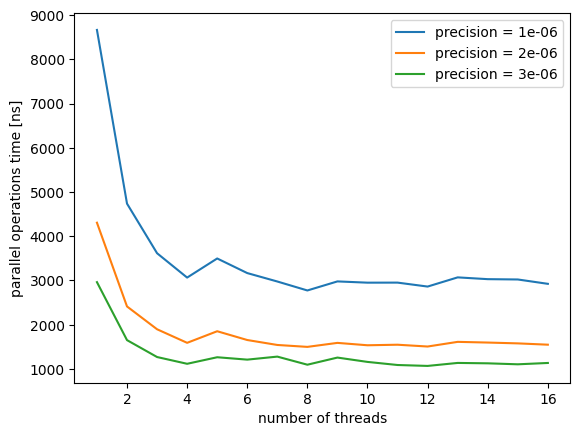

In [14]:
plt.figure(dpi=100)
for precision in precisions:
    plt.plot(threads, par_times[precision],
             label=f'precision = {precision}')
plt.ylabel('parallel operations time [ns]')
plt.xlabel('number of threads')
plt.legend()
plt.show()

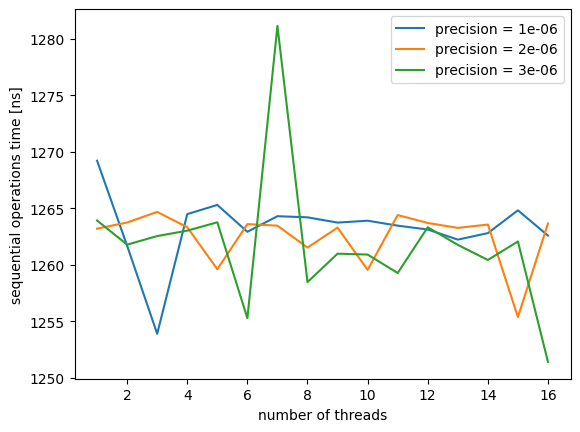

In [15]:
for precision in precisions:
    plt.plot(threads, seq_times[precision],
             label=f'precision = {precision}')
plt.ylabel('sequential operations time [ns]')
plt.xlabel('number of threads')
plt.legend()
plt.show()

In [20]:
def speedup(st, pt, p):
    f = st / (st + pt)
    return 1 / (f + (1 - f) / p)

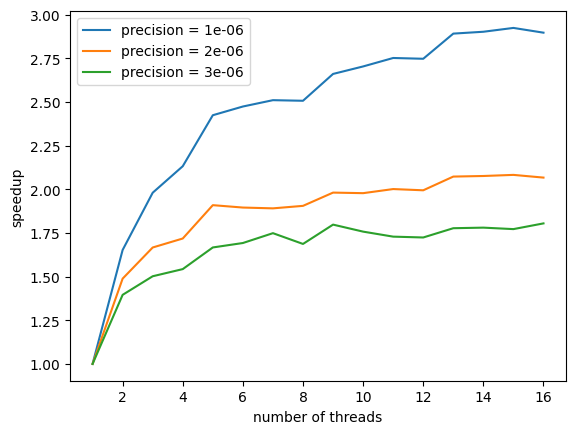

In [21]:
for precision in precisions:
    plt.plot(threads,
            [speedup(seq_times[precision][p - 1], par_times[precision][p - 1], p)
             for p in threads],
             label=f'precision = {precision}')
plt.ylabel('speedup')
plt.xlabel('number of threads')
plt.legend()
plt.show()


In [22]:
def gb_speedup(st, pt, p):
    s = st / (st + pt / p)
    return (1 - s) * p + s

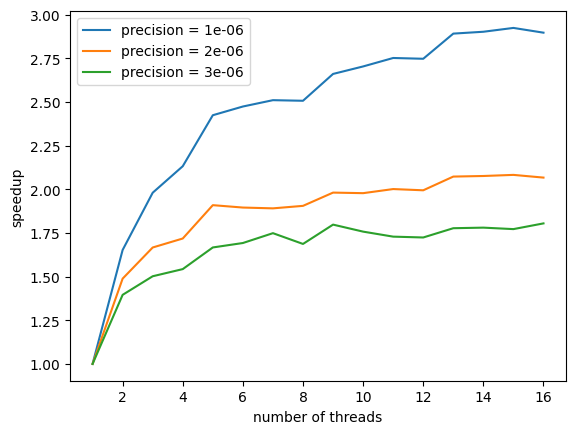

In [23]:
for precision in precisions:
    plt.plot(threads,
            [gb_speedup(seq_times[precision][p - 1], par_times[precision][p - 1], p)
             for p in threads],
             label=f'precision = {precision}')
plt.ylabel('speedup')
plt.xlabel('number of threads')
plt.legend()
plt.show()

In [28]:
def kf_metric(st, pt, p):
    s = st / (st + pt / p)
    psi = (1 - s) * p + s
    return (1 / psi - 1 / p) / (1 - 1 / p)

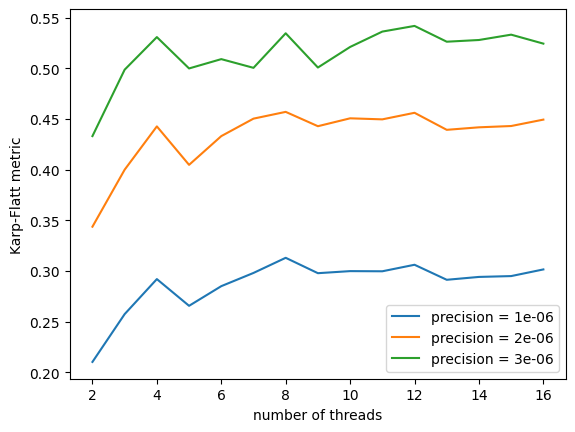

In [29]:
for precision in precisions:
    plt.plot(threads[1:],
            [kf_metric(seq_times[precision][p - 1], par_times[precision][p - 1], p)
             for p in threads[1:]],
             label=f'precision = {precision}')
plt.ylabel('Karp-Flatt metric')
plt.xlabel('number of threads')
plt.legend()
plt.show()